## Introduction: The Problem of finite precision

### Arithmetic operations are no longer associate or communative.


We start by importing our usual libraries, plus the system library **sys** for some extra features.


In [1]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import numpy as np
import pylab as plt
import sys

#IF YOU DO NOT HAVE A (LA)TEX install comment out the below line of code
#let us use Tex in our figure captions
plt.rc('text', usetex=True)

Populating the interactive namespace from numpy and matplotlib


Here we output machine epsilon as a decimal and as a hexidecimal number.  It's $2^{-52}$.

In [5]:
print('epsilon=%g' % sys.float_info.epsilon)
# output: 2.22045e-16
epsilon = sys.float_info.epsilon
print('epsilon(hex) = %s' % float.hex(epsilon))
# output:  0x1.0000000000000p-52

epsilon=2.22045e-16
epsilon(hex) = 0x1.0000000000000p-52


We're going to be very explicit and declare 1.0 and 2.0 as variables.  Sadly, there is no const declaration in Python,  unlike Fortran or C++.

The goal is to numerically compute the derivative of $f(x)=x$ near $x=1$.  If we use the limit definition of the derivative, we have

$$ f^\prime(x) \approx \frac{f(x+h)-f(x)}{h} = \frac{ (1+h)-1}{h}  $$
As this is equivalent to two points formula for finding the slope of the line, in any arithmatic, this should be exact. 

Here we compute three different formulas for computing the slope, using a set of $h$ values near machine epsilon. 
The second formula is just using the distributive rule, **which only holds in exact arithmatic**

The third formula uses a central difference formula for $f^\prime(x)$, namely
$$
f^\prime(x)=\frac{f(x+h)-f(x-h)}{2h}
$$

In [6]:
y=np.linspace(1e-15,5e-17,3000) #vector of finite difference deltas
one = np.float64(1.0) 
two = np.float64(2.0)
x=np.divide((y+one)-one,y) #forward difference
x2=np.divide((one-one)+y,y) #rearranged forward difference
x3=np.divide((one+y)-(one-y),two*y) #central difference

Note that we work on the entire array of $h$'s at once- a *vector* algorithm.  We know plot the results.

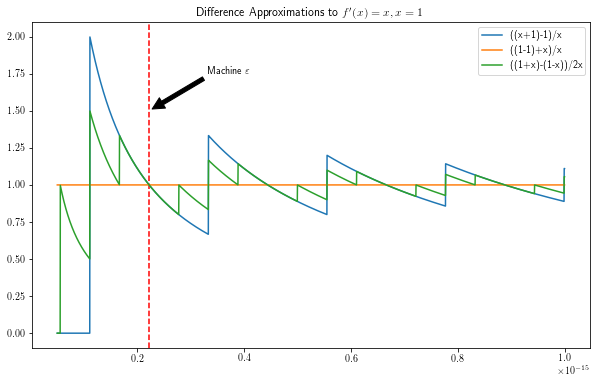

In [7]:
fig, ax = plt.subplots() #multiple plots all on figure ax

plt.axvline(epsilon,color='r',linestyle='--') #plot vertical line for epsilon & annotate
ax.annotate(r"Machine $\varepsilon$",xy=(epsilon,1.5),xytext=(1.5*epsilon,1.75),arrowprops=dict(facecolor='black', shrink=0.05))

ax.plot(y,x, label='((x+1)-1)/x') # plot forward difference
ax.plot(y,x2,label='((1-1)+x)/x') # plot rearranged forward difference
ax.plot(y,x3, label='((1+x)-(1-x))/2x') # plot central difference
plt.ylim([-.1,2.1])
ax.legend() #print the legend in the default place("best")

#title 
plt.title(r"Difference Approximations to $f^\prime(x)=x, x=1$") # r is for not parsing special chars

plt.show()

#plt.savefig('cancel.png')  #optional save the figure

So below machine epsilon, we are approaching 100% error.


### Frac!

Most computers (for obvious reasons) use a binary-based system.  
In python, we express $x^y$ as x**y.

In [1]:
print((2.1)**(1/3))

1.2805791649874942


In [2]:
print((-1.0)**(1/3))

(0.5000000000000001+0.8660254037844386j)


In [7]:
import numpy as np
print(np.power(-1,1/3))

nan


/Users/Undertrick/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


### What's going on?

### Not your inverse

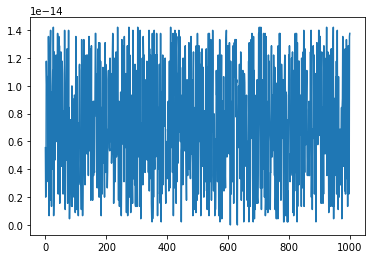

In [9]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x=2**(-10)
delx=2**(-56)*np.random.rand(1000)
xtil=x+delx
plt.plot(np.abs(xtil-x)/np.abs(x))
plt.figure()
plt.show()

We apply the cosine operator to the perturbed data and look at the relative error.

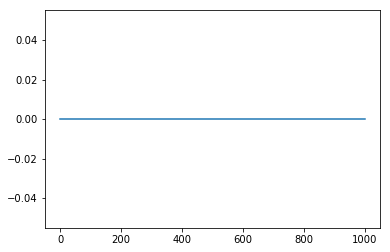

In [11]:
xtil=x+delx
temp=np.cos(xtil)
plt.plot(np.abs(temp-np.cos(x))/np.abs(np.cos(x)))


plt.figure()
plt.show()

Finally we undo the operation by appying $\cos^{-1} x$.  In perfect arithmetic, we'd expect to get back the perturbation $x+\delta x$, or in rounded arithmetic, a relative error of order $\epsilon$.  But we've lost information.  Is it due to $\cos^{-1} x$?  

10239996.7444


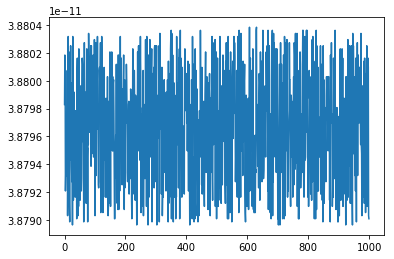

In [12]:
final=np.arccos(temp)

plt.figure()
plt.plot(np.abs(final-xtil)/np.abs(xtil))

cond=np.abs(np.cos(x)/1E-4/np.sqrt(1-np.cos(x)**2))
print(cond)